# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

       # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print('kjgjhgy',city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"] ["temp_max"]
        city_humidity = city_weather ["main"] ["humidity"]
        city_clouds = city_weather ["clouds"] ["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
kjgjhgy {'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.83, 'feels_like': 290.69, 'temp_min': 290.06, 'temp_max': 291.48, 'pressure': 998, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 190, 'gust': 10.8}, 'clouds': {'all': 100}, 'dt': 1709072163, 'sys': {'type': 2, 'id': 2005257, 'country': 'US', 'sunrise': 1709036077, 'sunset': 1709076456}, 'timezone': -18000, 'id': 4513583, 'name': 'Hamilton', 'cod': 200}
Processing Record 2 of Set 1 | kapuskasing
kjgjhgy {'coord': {'lon': -82.4331, 'lat': 49.4169}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 266.32, 'temp_min': 271.15, 'temp_max': 271.2, 'pressure': 998, 'humidity': 93}, 'visibility':

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,291.48,78,100,8.23,US,1709072163
1,kapuskasing,49.4169,-82.4331,271.20,93,100,4.12,CA,1709072231
2,jeddah,21.5169,39.2192,294.07,60,0,1.03,SA,1709072231
3,bredasdorp,-34.5322,20.0403,290.58,73,2,6.91,ZA,1709072232
4,teofilo otoni,-17.8575,-41.5053,296.38,88,51,1.15,BR,1709072233


In [18]:
# Export the City_Data into a csv
import os
if not os.path.exists('output_data'):
    os.makedirs('output_data')

output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,291.48,78,100,8.23,US,1709072163
1,kapuskasing,49.4169,-82.4331,271.20,93,100,4.12,CA,1709072231
2,jeddah,21.5169,39.2192,294.07,60,0,1.03,SA,1709072231
3,bredasdorp,-34.5322,20.0403,290.58,73,2,6.91,ZA,1709072232
4,teofilo otoni,-17.8575,-41.5053,296.38,88,51,1.15,BR,1709072233


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

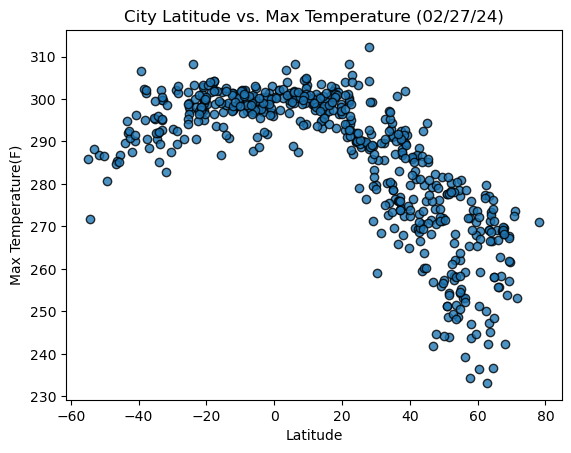

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
plt.title(f"City Latitude vs. Max Temperature ({time. strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid= True

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

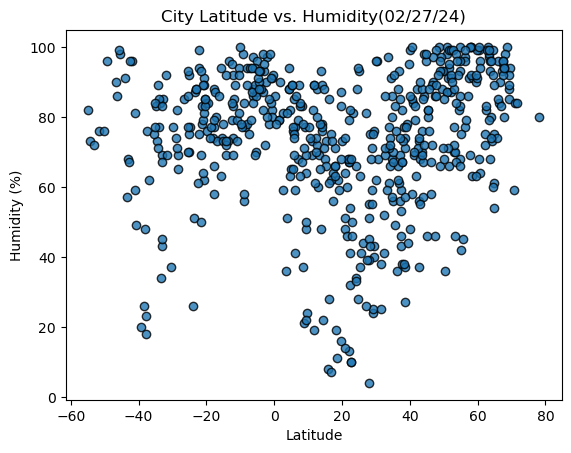

In [21]:
#plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
plt.title(f"City Latitude vs. Humidity({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

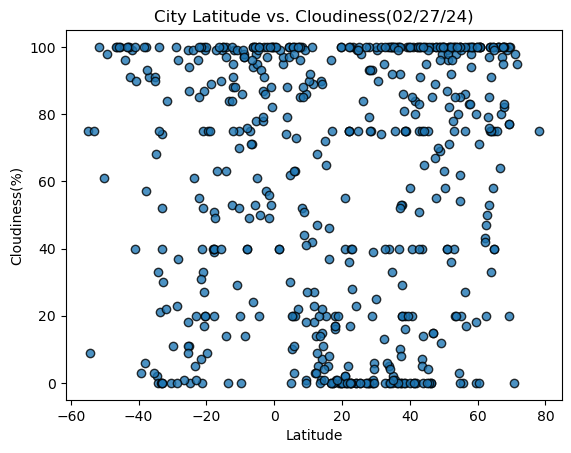

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

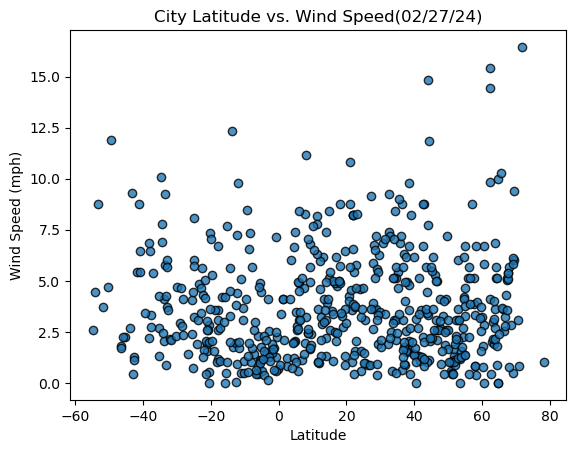

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def LinearRegressionplots(df, COLUMN):   


    # Compute linear regression for latitude vs. max temperature
    slope, intercept, r_value, p_value, std_err = linregress(df['Lat'], df[COLUMN])
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(df['Lat'], df[COLUMN], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(df['Lat'], slope * df['Lat'] + intercept, "r-")
    plt.title(f'City Latitude vs. {COLUMN} with Linear Regression')
    plt.xlabel('Latitude')
    plt.ylabel(COLUMN)
    plt.annotate(line_eq, (min(df['Lat'])+5, min(df[COLUMN])+5), fontsize=15, color="red")
    plt.grid=True

    # Display the plot
    plt.savefig(f"output_data/Latitude_vs_{COLUMN.replace(' ','_')}_Regression.png") 
    plt.show()
    print(" the r-value is:", r_value)

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,291.48,78,100,8.23,US,1709072163
1,kapuskasing,49.4169,-82.4331,271.20,93,100,4.12,CA,1709072231
2,jeddah,21.5169,39.2192,294.07,60,0,1.03,SA,1709072231
6,remire-montjoly,4.9167,-52.2667,300.17,65,0,2.06,GF,1709072234
7,aswan,24.0934,32.9070,289.97,34,0,4.61,EG,1709072234


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,290.58,73,2,6.91,ZA,1709072232
4,teofilo otoni,-17.8575,-41.5053,296.38,88,51,1.15,BR,1709072233
5,waitangi,-43.9535,-176.5597,289.72,91,96,2.68,NZ,1709072233
8,afaahiti,-17.7500,-149.2833,302.07,77,39,3.55,PF,1709072235
11,edinburgh of the seven seas,-37.0676,-12.3116,288.50,62,91,5.36,SH,1709072237


###  Temperature vs. Latitude Linear Regression Plot

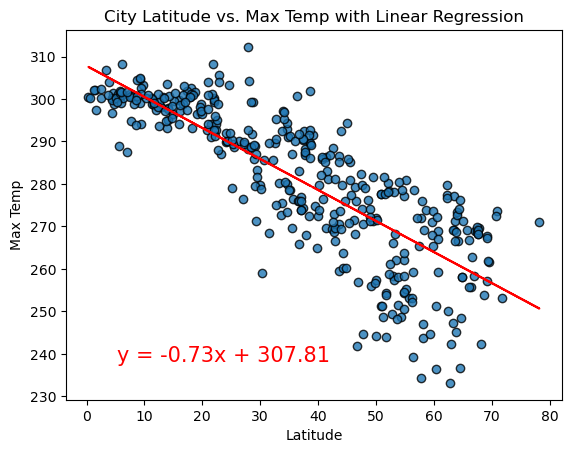

 the r-value is: -0.8245804372596128


In [38]:
# Linear regression on Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Max Temp')

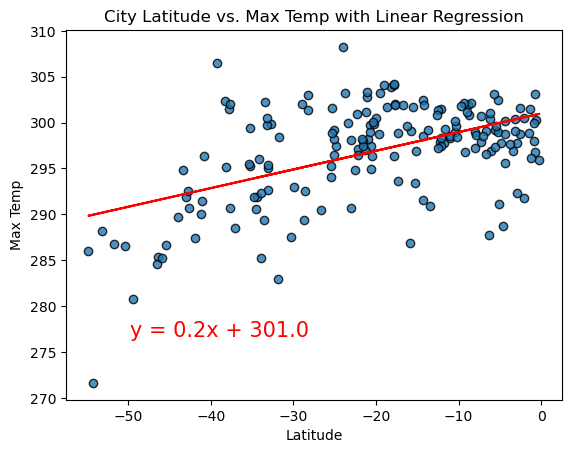

 the r-value is: 0.518709531780327


In [39]:
# Linear regression on Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:** Based off of both the northern and southern hemispheres, the closer the latitude is towards zero, the temperature change tends to increase. This is a strong coorelation between latitude and temperature, creating a negative coorelation in the northern hemisphere and a positive one in the south. 

### Humidity vs. Latitude Linear Regression Plot

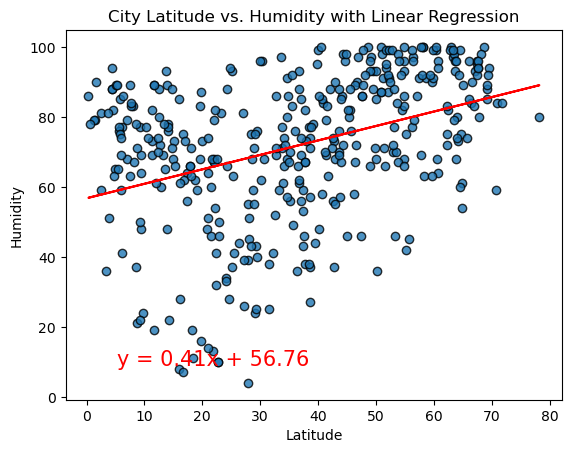

 the r-value is: 0.3818978855566543


In [40]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Humidity')

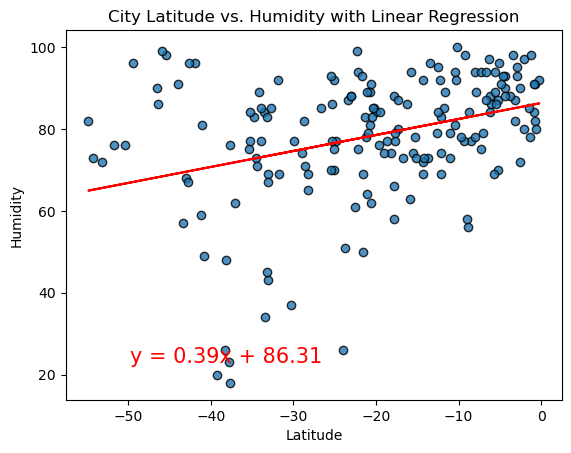

 the r-value is: 0.34045960607348685


In [41]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** Both r-values in each hemisphere are over .3 meaning while there isn't a strong coorelation between latitude and humidity, there is the indication of one. There is a positive coorelation in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

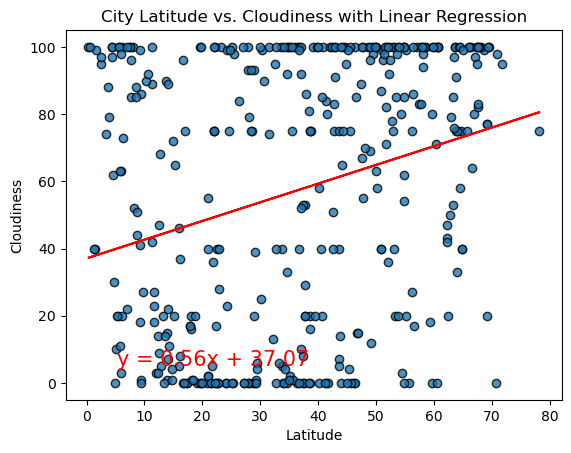

 the r-value is: 0.2743496254512192


In [42]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Cloudiness')

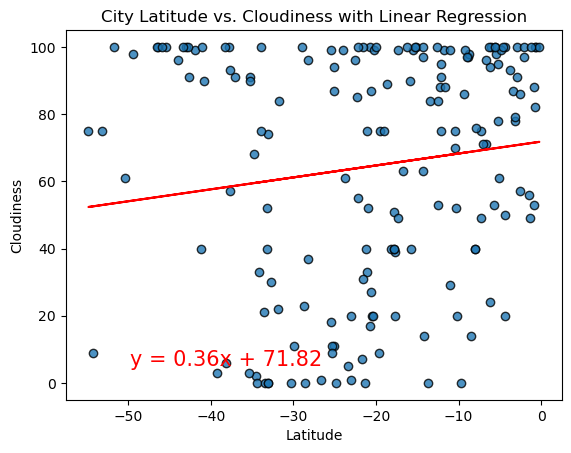

 the r-value is: 0.13885288407214114


In [43]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** Since both r-values are close to zero, there is very little to no coorelation between cloudiness and latitude in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

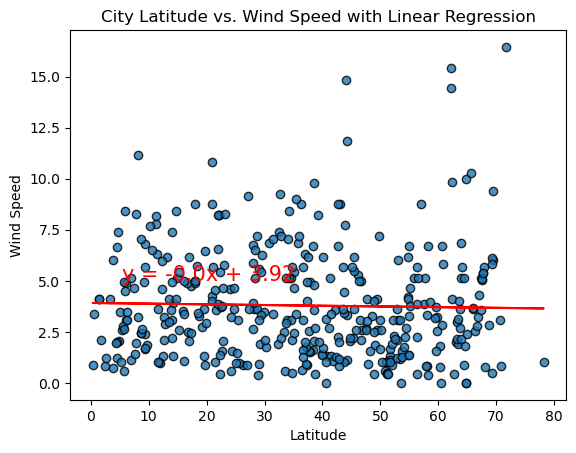

 the r-value is: -0.025224174277267773


In [44]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Wind Speed')

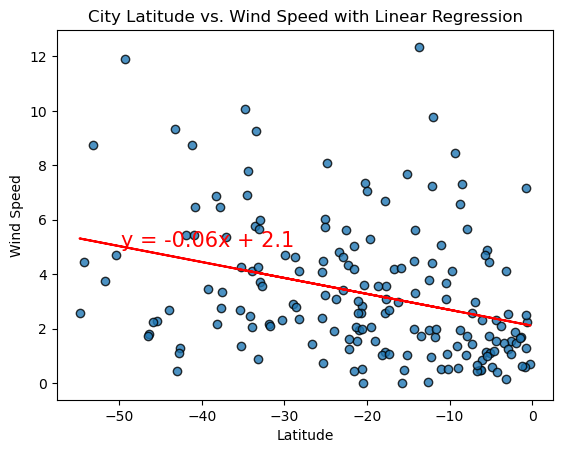

 the r-value is: -0.3271641570771516


In [45]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** While there is very little coorelation in the northern hemisphere between wind speed and latitude, there is a slight negative coorelation that forms in the southern hemisphere with an r-value over -.3.